In [5]:
from scipy import stats
from sklearn.impute import SimpleImputer
import seaborn as sns
import pandas as pd
import numpy as np
# Question 5
df = pd.read_csv("Diabetes.csv")

for col in df.columns:   
    x=pd.to_numeric(df[col], errors='coerce')
    idx = x.isna()
    seen = set()
    uniq = [x for x in df[idx][col] if x not in seen and not seen.add(x)]
    for j in df[idx][col]:
        df[col] = df[col].replace({j : np.NaN})
# 5-a
MyDataFram = df.copy()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(MyDataFram)
my_array = imp.transform(MyDataFram)
MyDataFram = pd.DataFrame(my_array, columns = df.columns)

# 5-b
# IQR Outliers Detection
i = 0
outliers_record = []
MyDataFram_IQR = MyDataFram.copy()
for col in MyDataFram_IQR.columns:
    Q1 = np.percentile(MyDataFram_IQR[col], 25, interpolation = 'midpoint')  
    Q3 = np.percentile(MyDataFram_IQR[col], 75, interpolation = 'midpoint')  
    IQR = Q3 - Q1  #or IQR = stats.iqr(MyDataFram_IQR, interpolation = 'midpoint') 
    upper = MyDataFram_IQR[MyDataFram_IQR[col] > (Q3+1.5*IQR)] # Upper bound 
    lower = MyDataFram_IQR[MyDataFram_IQR[col] < (Q1-1.5*IQR)] # Lower bound
    frames = [upper, lower]
    result = pd.concat(frames)
    outliers_record.append(result)    

for rec in outliers_record:
    print('outliers record for column', MyDataFram_IQR.columns[i])
    i = i + 1
    display(rec)
    

outliers record for column Pregnancies


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15.0,136.0,70.0,32.0,110.0,37.1,0.153,43.0,1.0
159,17.0,163.0,72.0,41.0,114.0,40.9,0.817,47.0,1.0
298,14.0,100.0,78.0,25.0,184.0,36.6,0.412,46.0,1.0
455,14.0,175.0,62.0,30.0,0.0,33.6,0.212,38.0,1.0


outliers record for column Glucose


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
374,2.0,300.0,52.0,43.0,158.0,36.2,0.816,28.0,0.0
386,5.0,250.0,74.0,29.0,0.0,32.3,0.660,35.0,1.0
402,5.0,800.0,84.0,41.0,88.0,35.0,0.286,35.0,1.0
75,1.0,0.0,48.0,20.0,0.0,24.7,0.140,22.0,0.0
182,1.0,0.0,74.0,20.0,23.0,27.7,0.299,21.0,0.0
342,1.0,0.0,68.0,35.0,0.0,32.0,0.389,22.0,0.0
349,5.0,0.0,80.0,32.0,0.0,41.0,0.346,37.0,1.0
384,1.0,12.0,70.0,24.0,110.0,24.3,0.221,25.0,0.0


outliers record for column BloodPressure


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
43,9.0,171.0,110.0,24.000000,240.0,45.4,0.721,54.000000,1.0
84,5.0,137.0,108.0,0.000000,0.0,48.8,0.227,37.000000,1.0
106,1.0,96.0,122.0,0.000000,0.0,22.4,0.207,27.000000,0.0
177,0.0,129.0,110.0,46.000000,130.0,67.1,0.319,26.000000,1.0
362,5.0,103.0,108.0,37.000000,0.0,39.2,0.305,65.000000,0.0
7,10.0,115.0,0.0,0.000000,0.0,35.3,0.134,29.000000,0.0
15,7.0,100.0,0.0,0.000000,0.0,30.0,0.484,32.000000,1.0
18,1.0,103.0,30.0,38.000000,83.0,43.3,0.183,33.000000,0.0
49,7.0,105.0,0.0,0.000000,0.0,0.0,0.305,24.000000,0.0
60,2.0,84.0,0.0,0.000000,0.0,0.0,0.304,21.000000,0.0


outliers record for column SkinThickness


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


outliers record for column Insulin


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2.0,197.000000,70.0,45.0,543.0,30.5,0.158,53.0,1.000000
13,1.0,189.000000,60.0,23.0,846.0,30.1,0.398,59.0,1.000000
54,7.0,150.000000,66.0,42.0,342.0,34.7,0.718,42.0,0.000000
111,8.0,155.000000,62.0,26.0,495.0,34.0,0.543,46.0,1.000000
139,5.0,105.000000,72.0,29.0,325.0,36.9,0.159,28.0,0.000000
153,1.0,153.000000,82.0,42.0,485.0,40.6,0.687,23.0,0.000000
186,8.0,123.088477,68.0,36.0,495.0,30.1,0.615,60.0,1.000000
199,4.0,148.000000,60.0,27.0,318.0,30.9,0.150,29.0,1.000000
220,0.0,177.000000,60.0,29.0,478.0,34.6,1.072,21.0,1.000000
228,4.0,197.000000,70.0,39.0,744.0,36.7,2.329,31.0,0.000000


outliers record for column BMI


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0.0,162.0,76.0,56.0,100.000000,53.2,0.759,25.0,1.0
125,1.0,88.0,30.0,42.0,99.000000,55.0,0.496,26.0,1.0
177,0.0,129.0,110.0,46.0,130.000000,67.1,0.319,26.0,1.0
193,11.0,135.0,0.0,0.0,0.000000,52.3,0.578,40.0,1.0
247,0.0,165.0,90.0,33.0,680.000000,52.3,0.427,23.0,0.0
303,5.0,115.0,98.0,0.0,85.040161,52.9,0.209,28.0,1.0
445,0.0,180.0,78.0,63.0,14.000000,59.4,2.420,25.0,1.0
9,8.0,125.0,96.0,0.0,0.000000,0.0,0.232,54.0,1.0
49,7.0,105.0,0.0,0.0,0.000000,0.0,0.305,24.0,0.0
60,2.0,84.0,0.0,0.0,0.000000,0.0,0.304,21.0,0.0


outliers record for column DiabetesPedigreeFunction


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0.0,137.000000,40.0,35.0,168.0,43.1,2.288,33.0,1.0
12,10.0,139.000000,80.0,0.0,0.0,27.1,1.441,57.0,0.0
39,4.0,111.000000,72.0,47.0,207.0,37.1,1.390,56.0,1.0
45,0.0,180.000000,66.0,39.0,0.0,42.0,1.893,25.0,1.0
58,0.0,123.088477,82.0,0.0,0.0,40.5,1.781,44.0,0.0
100,1.0,163.000000,72.0,0.0,0.0,39.0,1.222,33.0,1.0
147,2.0,106.000000,64.0,35.0,119.0,30.5,1.400,34.0,0.0
187,1.0,128.000000,98.0,41.0,58.0,32.0,1.321,33.0,1.0
218,5.0,85.000000,74.0,22.0,0.0,29.0,1.224,32.0,1.0
228,4.0,197.000000,70.0,39.0,744.0,36.7,2.329,31.0,0.0


outliers record for column Age


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5.0,132.0,80.0,0.0,0.000000,26.8,0.186,69.0,0.000000
129,0.0,105.0,84.0,0.0,0.000000,27.9,0.741,62.0,1.000000
148,5.0,147.0,78.0,0.0,0.000000,33.7,0.218,65.0,0.000000
221,2.0,158.0,90.0,0.0,0.000000,31.6,0.805,66.0,0.358149
263,3.0,142.0,80.0,15.0,0.000000,32.4,0.200,63.0,0.000000
294,0.0,161.0,50.0,0.0,85.040161,21.9,0.254,65.0,0.000000
361,5.0,158.0,70.0,0.0,0.000000,29.8,0.207,63.0,0.000000
362,5.0,103.0,108.0,37.0,0.000000,39.2,0.305,65.0,0.000000
363,4.0,146.0,78.0,0.0,0.000000,38.5,0.520,67.0,1.000000
390,1.0,100.0,66.0,29.0,196.000000,32.0,0.444,99.0,0.000000


outliers record for column Outcome


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


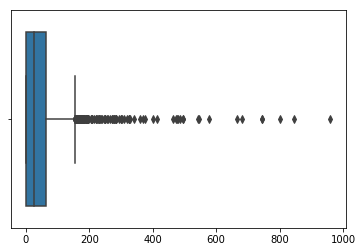

In [6]:
sns.boxplot(MyDataFram_IQR)

In [7]:
# 5-c
correct_record = []
MyDataFram_zscore = MyDataFram.copy()
for col in MyDataFram_zscore.columns:
    MyDataFram_zscore[col + '_z'] = stats.zscore(MyDataFram_zscore[col])
    qu = col + '_z' + ' <= 3 & ' + col + '_z' + ' >= -3'
    Without_Outliers = MyDataFram_zscore.query(qu)
    MyDataFram_zscore =  Without_Outliers.copy()
    
#display(MyDataFram_zscore)
print('Outliers record number using z_score \t', MyDataFram.shape[0] - MyDataFram_zscore.shape[0])
print('Outliers record number using IQR     \t', pd.concat(outliers_record).drop_duplicates().shape[0])   

Outliers record number using z_score 	 55
Outliers record number using IQR     	 108
